## Задание 1


Данные о количестве пассажиров

https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line



In [264]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
from torch import nn
from torch.autograd import Variable
import sys
%matplotlib inline



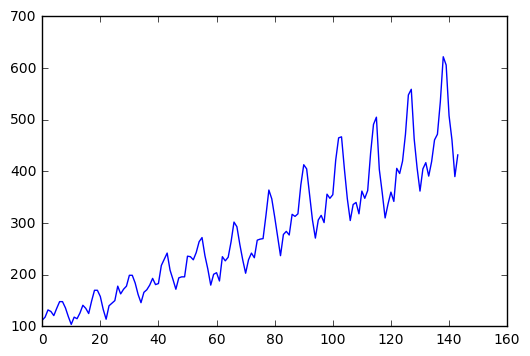

In [265]:
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], delimiter=";", engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [279]:
# подготовливаем данные

#dataset = dataset.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [280]:
# разбиваем данные на train / test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


(96, 48)


In [281]:
# Целевая переменная - сдвинутая последовательность значений входов
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])

    return np.array(dataX), np.array(dataY)

In [282]:
# Пример подготовленных данных

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [283]:
print testX.shape

(46, 1, 1)


Обучим модель, подавая наблюдения в том же порядке

In [284]:
input_size = 1
hidden_size = 1
num_layers = 3
model = nn.LSTM(input_size, hidden_size, num_layers)

Epoch num 199

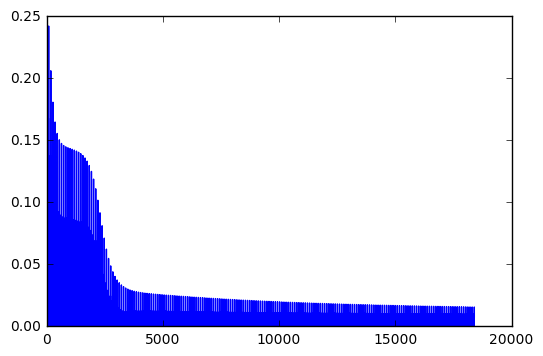

In [287]:
batch_size = 1
look_back = 1
loss_fn = torch.nn.MSELoss(size_average=True)
epoch_num = 200
optimizer = torch.optim.Adam(model.parameters())
loss_arr = list()


poses = np.arange(len(trainX_copy) - batch_size - look_back)
for epoch in range(epoch_num):
    sys.stdout.write("\rEpoch num {}".format(epoch))
    for i in poses:
        optimizer.zero_grad()
        in_data = Variable(torch.from_numpy(trainX[i:i+batch_size]))
        out_data = Variable(torch.from_numpy(trainY[i:i+batch_size]))
        output, hn = model(in_data)
        loss_arr.append(loss.data.tolist()[0])
        loss = loss_fn(output, out_data)
        loss.backward()
        optimizer.step()
plt.plot(loss_arr)

In [303]:
output, hn = model(Variable(torch.from_numpy(testX[:-1])))
answer = Variable(torch.from_numpy(testX[1:]))
print loss_fn(output, answer).data.numpy()[0]

0.0417381


In [293]:
print testX[0].reshape(1,1,1)
seed = testX[0].reshape(1,1,1)
result = np.empty(testX.shape[0])
#result[0] = seed
for i in np.ndindex(result.shape):
    result[i] = np.squeeze(seed)
    new_seed, hn = model(Variable(torch.from_numpy(seed)))
    seed = new_seed.data.numpy()
    


[[[ 0.40733591]]]


In [332]:
from collections import defaultdict
dt = defaultdict(list)

dt[0].append(5)
dt[0].append(6)






In [351]:
a = dict()
?a.setdefault
print a.get(0)



None


In [338]:
print 7 not in dt
print 8 not in dt
dt

False
True


defaultdict(list, {0: [5, 6], 7: []})

In [344]:
%%timeit 
for _ in range(10000):
    a = not 7 in dt

100 loops, best of 3: 2.11 ms per loop


In [345]:
%%timeit 
for _ in range(10000):
    a = 7 not in dt

100 loops, best of 3: 2.24 ms per loop


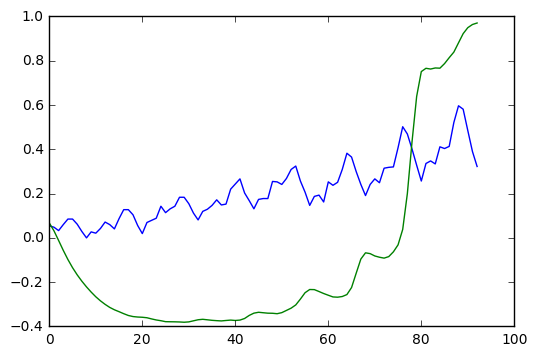

In [331]:
#plt.plot(result)
plt.plot(np.squeeze(trainY))
answer = np.empty(trainX.shape[0])
an, hn = model(Variable(torch.from_numpy(trainX)))
answer = np.squeeze(an.data.numpy())
plt.plot(answer)
plt.show()

Epoch num 199

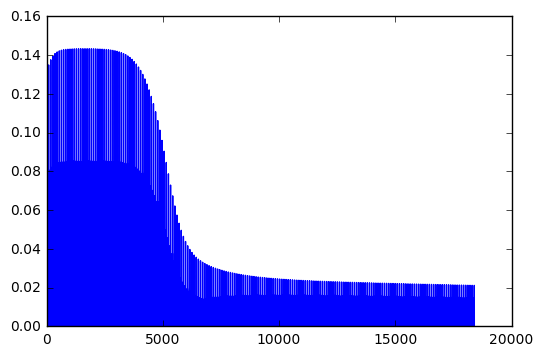

In [305]:
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


input_size = look_back
hidden_size = 1
num_layers = 3
model = nn.LSTM(input_size, hidden_size, num_layers)

batch_size = 1
look_back = 1
loss_fn = torch.nn.MSELoss(size_average=True)
epoch_num = 200
optimizer = torch.optim.Adam(model.parameters())
loss_arr = list()


poses = np.arange(len(trainX_copy) - batch_size - look_back)
for epoch in range(epoch_num):
    sys.stdout.write("\rEpoch num {}".format(epoch))
    for i in poses:
        optimizer.zero_grad()
        in_data = Variable(torch.from_numpy(trainX[i:i+batch_size]))
        out_data = Variable(torch.from_numpy(trainY[i:i+batch_size]))
        output, hn = model(in_data)
        loss_arr.append(loss.data.tolist()[0])
        loss = loss_fn(output, out_data)
        loss.backward()
        optimizer.step()
plt.plot(loss_arr)

In [311]:
an.data.numpy()

array([[[ 0.40872025]],

       [[ 0.71799898]],

       [[ 0.87369436]],

       [[ 0.93543422]],

       [[ 0.9591136 ]],

       [[ 0.96860683]],

       [[ 0.97284675]],

       [[ 0.97505826]],

       [[ 0.97652525]],

       [[ 0.97760916]],

       [[ 0.97795302]],

       [[ 0.97808886]],

       [[ 0.97839022]],

       [[ 0.97830737]],

       [[ 0.97834772]],

       [[ 0.97836798]],

       [[ 0.97806287]],

       [[ 0.97787702]],

       [[ 0.97784728]],

       [[ 0.97799587]],

       [[ 0.97836012]],

       [[ 0.97883284]],

       [[ 0.97884488]],

       [[ 0.97861928]],

       [[ 0.97865337]],

       [[ 0.97836643]],

       [[ 0.97826594]],

       [[ 0.9781962 ]],

       [[ 0.97803813]],

       [[ 0.97792107]],

       [[ 0.97789454]],

       [[ 0.97793919]],

       [[ 0.97811121]],

       [[ 0.97840285]],

       [[ 0.97834098]],

       [[ 0.97821707]],

       [[ 0.97827762]],

       [[ 0.97822917]],

       [[ 0.97807926]],

       [[ 0.97801334]],



In [320]:
gen = (x for x in range(10))

reduce(lambda x, y)


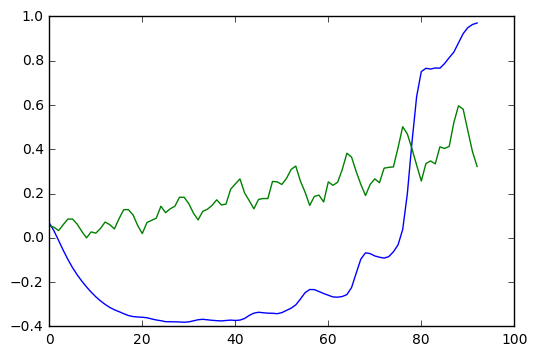

In [325]:
an, hn = model(Variable(torch.from_numpy(trainX)))

answer = np.squeeze(an.data.numpy())
answer = np.concatenate([answer])
plt.plot(answer)
plt.plot(np.squeeze(trainY))
plt.show()

Теперь будем подавать наблюдения в случайном порядке

In [144]:
#one to one
input_size = 1
hidden_size = 1
num_layers = 3
model_shuffle = nn.LSTM(input_size, hidden_size, num_layers)

Epoch num 199

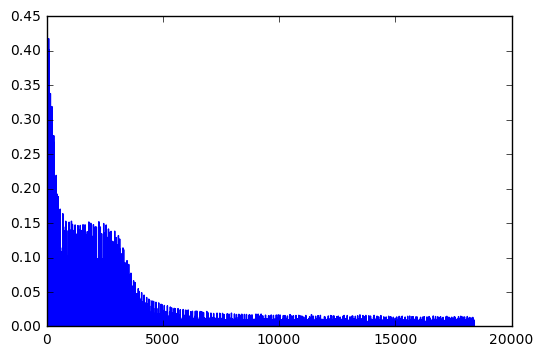

In [145]:
batch_size = 1
look_back = 1
loss_fn = torch.nn.MSELoss(size_average=True)
epoch_num = 200
optimizer = torch.optim.Adam(model_shuffle.parameters())
loss_arr = list()


poses = np.arange(len(trainX) - batch_size - look_back)
for epoch in range(epoch_num):
    sys.stdout.write("\rEpoch num {}".format(epoch))
    for i in poses:
        optimizer.zero_grad()
        in_data = Variable(torch.from_numpy(trainX[i:i+batch_size]))
        out_data = Variable(torch.from_numpy(trainX[i+1:i+batch_size+1]))
        output, hn = model_shuffle(in_data)
        loss_arr.append(loss.data.tolist()[0])
        
        loss = loss_fn(output, out_data)
        loss.backward()
        optimizer.step()
    np.random.shuffle(poses)

plt.plot(loss_arr)

In [146]:
output, hn = model_shuffle(Variable(torch.from_numpy(testX[:-1])))
answer = Variable(torch.from_numpy(testX[1:]))
print loss_fn(output, answer).data.numpy()[0]

0.0623233


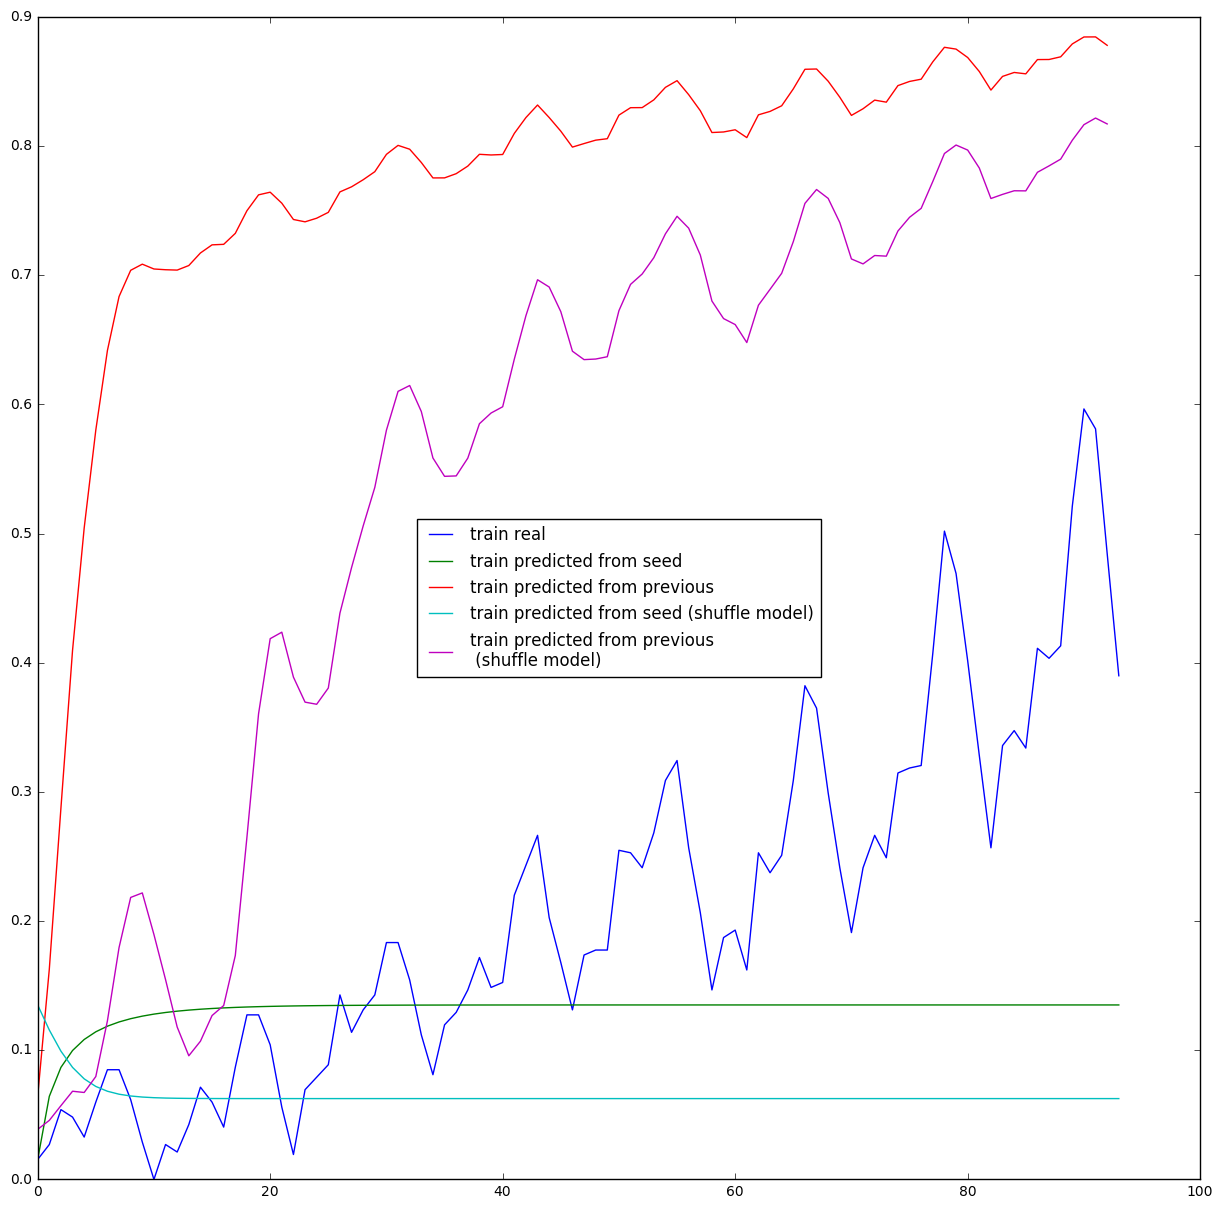

In [151]:
#plt.title("Train results")
#plt.plot(trainX)
seed = Variable(torch.from_numpy(trainX[0].reshape((1,1,1))))
train_predict = np.zeros_like(trainX)
train_predict_from_prev, hn = model(Variable(torch.from_numpy(trainX[:-1])))


for i in np.ndindex(train_predict.shape):
    train_predict[i] = seed.data.numpy()
    seed, hn = model(seed, (Variable(torch.zeros(3, 1, 1)), Variable(torch.zeros(3, 1, 1))))
    seed = Variable(torch.from_numpy(seed.data.numpy()))

train_predict_shuffle = np.zeros_like(trainX)
train_predict_from_prev_shuffle, hn = model_shuffle(Variable(torch.from_numpy(trainX[:-1])))
for i in np.ndindex(train_predict.shape):
    train_predict_shuffle[i] = seed.data.numpy()
    seed, hn = model_shuffle(seed, (Variable(torch.zeros(3, 1, 1)), Variable(torch.zeros(3, 1, 1))))
    seed = Variable(torch.from_numpy(seed.data.numpy()))   

plt.figure(figsize=(15,15))
plt.plot(np.squeeze(trainX), label = "train real")
plt.plot(np.squeeze(train_predict), label = "train predicted from seed")
plt.plot(np.squeeze(train_predict_from_prev.data.numpy()), label = "train predicted from previous")
plt.plot(np.squeeze(train_predict_shuffle), label = "train predicted from seed (shuffle model)")
plt.plot(np.squeeze(train_predict_from_prev_shuffle.data.numpy()), label = "train predicted from previous\n (shuffle model)")
plt.legend(loc="best")
plt.show()

Видим, что нашей нейросети недостаточно информации - она не может определить, когда она возрастает, а когда убывает. Также видим, что в какой-то момент мы выходим на плато. 

In [244]:
#many to one
input_size = 2
hidden_size = 1
num_layers = 1
model = nn.LSTM(input_size, hidden_size, num_layers)

In [245]:
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Epoch num 199

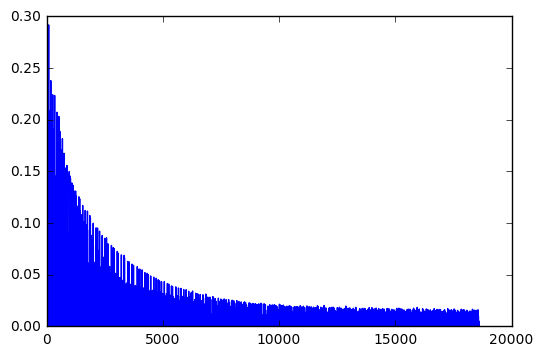

In [246]:
batch_size = 1
loss_fn = torch.nn.MSELoss(size_average=True)
epoch_num = 200
optimizer = torch.optim.Adam(model.parameters())
loss_arr = list()

poses = np.arange(len(trainX))
for epoch in range(epoch_num):
    sys.stdout.write("\rEpoch num {}".format(epoch))
    for i in poses:
        optimizer.zero_grad()
        in_data = Variable(torch.from_numpy(trainX[i:i+batch_size]))
        out_data = Variable(torch.from_numpy(trainY[i:i+batch_size]))
        output, hn = model(in_data)
        loss_arr.append(loss.data.tolist()[0])
        
        loss = loss_fn(output, out_data)
        loss.backward()
        optimizer.step()
    np.random.shuffle(poses)

plt.plot(loss_arr)

In [247]:
train_predict = np.zeros_like(trainY)
train_predict_from_prev, hn = model(Variable(torch.from_numpy(trainX[:-1])))

seed = trainX[0].reshape(1,1,2)

for i in np.ndindex(train_predict.shape):
    train_predict[i] = seed[0][0][0]
    new_seed_1, hn = model(Variable(torch.from_numpy(seed)))
    seed[0, 0, 0], seed[0, 0, 1] = seed[0, 0, 1], new_seed_1.data.numpy()

In [254]:
print train_predict[0]
print trainY[0]
print trainX[0]
print train_predict_from_prev[0].data.numpy()

0.015444
0.0540541
[[ 0.16953813  0.16953823]]
[[ 0.07182936]]


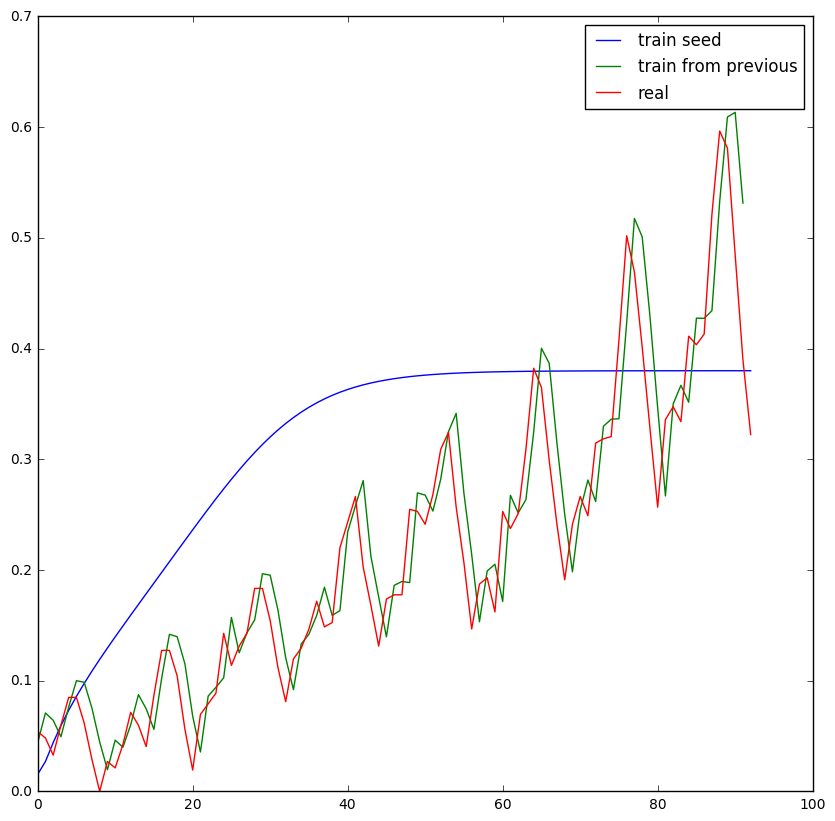

In [229]:
plt.figure(figsize=(10,10))
plt.plot(np.squeeze(train_predict), label = "train seed")
plt.plot(np.squeeze(train_predict_from_prev.data.numpy()), label = "train from previous")
plt.plot(trainY, label = "real")
plt.legend()
plt.show()

In [237]:
input_size = 5
hidden_size = 1
num_layers = 1
model = nn.LSTM(input_size, hidden_size, num_layers)

In [238]:
look_back = input_size
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Epoch num 199

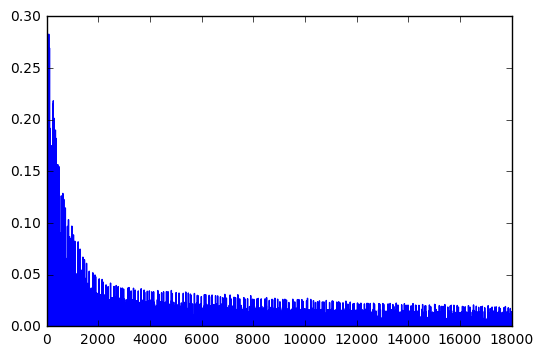

In [239]:
batch_size = 1
loss_fn = torch.nn.MSELoss(size_average=True)
epoch_num = 200
optimizer = torch.optim.Adam(model.parameters())
loss_arr = list()

poses = np.arange(len(trainX))
for epoch in range(epoch_num):
    sys.stdout.write("\rEpoch num {}".format(epoch))
    for i in poses:
        optimizer.zero_grad()
        in_data = Variable(torch.from_numpy(trainX[i:i+batch_size]))
        out_data = Variable(torch.from_numpy(trainY[i:i+batch_size]))
        output, hn = model(in_data)
        loss_arr.append(loss.data.tolist()[0])
        
        loss = loss_fn(output, out_data)
        loss.backward()
        optimizer.step()
    np.random.shuffle(poses)

plt.plot(loss_arr)

In [241]:
train_predict = np.zeros_like(trainY)
train_predict_from_prev, hn = model(Variable(torch.from_numpy(trainX[:-1])))

seed = trainX[0].reshape(1,1,5)

for i in np.ndindex(train_predict.shape):
    train_predict[i] = seed[0][0][0]
    new_seed_1, hn = model(Variable(torch.from_numpy(seed)))
    seed[0, 0, 0], seed[0, 0, 1], seed[0, 0, 2], seed[0, 0, 3], seed[0, 0, 4] =\
        seed[0, 0, 1], seed[0, 0, 2], seed[0, 0, 3], seed[0, 0, 4], new_seed_1.data.numpy()

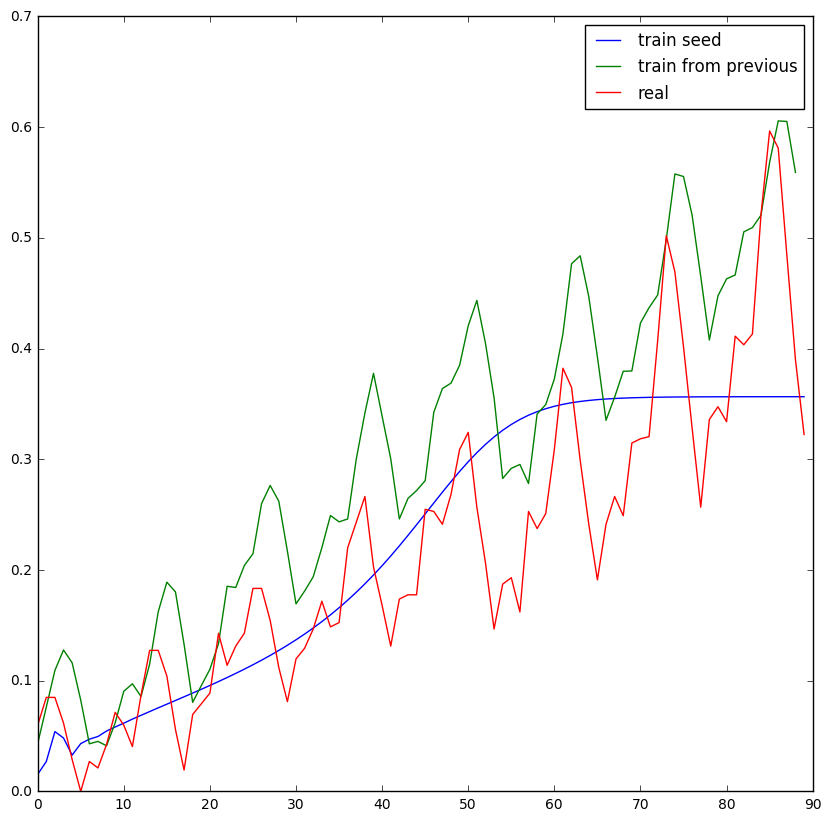

In [242]:
plt.figure(figsize=(10,10))
plt.plot(np.squeeze(train_predict), label = "train seed")
plt.plot(np.squeeze(train_predict_from_prev.data.numpy()), label = "train from previous")
plt.plot(trainY, label = "real")
plt.legend()
plt.show()

Используя torch.nn.LSTM сделать решить задачу предсказания временного ряда
1. one to one
2. many to many

Попробовать разные размеры окон и torch.nn.GRU вместо LSTM


In [ ]:
batch_size = 5 
look_back = 3
loss_fn = torch.nn.MSELoss(size_average=True)
epoch_num = 100
optimizer = torch.optim.Adam(model.parameters())
loss_arr = list()
for epoch in range(epoch_num):
    for i in range(len(trainX) - 5 - look_back):
        optimizer.zero_grad()
        in_data = Variable(torch.from_numpy(trainX[i:i+batch_size]))
        out_data = Variable(torch.from_numpy(trainX[i+look_back:i+batch_size+look_back]))
        output, hn = model(in_data)
        loss_arr.append(loss.data.tolist()[0])
        loss = loss_fn(output, out_data)
        loss.backward()
        optimizer.step()

## Задание 2

Сделать датасет из двоичных чисел содежащих по N цифр. 
Обучить RNN: (2N -> N) - (2 числа записанные друг за другом) -> (сложение по модулю 2 ** N) . 